In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


df = pd.read_csv('Desktop/datasets/silver.csv', parse_dates=['Date'], index_col=['Date'])

In [3]:
df.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2000-01-04,5.290,5.290,5.290,5.335,3,USD
2000-01-05,5.170,5.170,5.170,5.170,0,USD
2000-01-06,5.127,5.127,5.127,5.127,0,USD
2000-01-07,5.150,5.150,5.150,5.150,50,USD
2000-01-10,5.145,5.145,5.145,5.145,62,USD


In [4]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

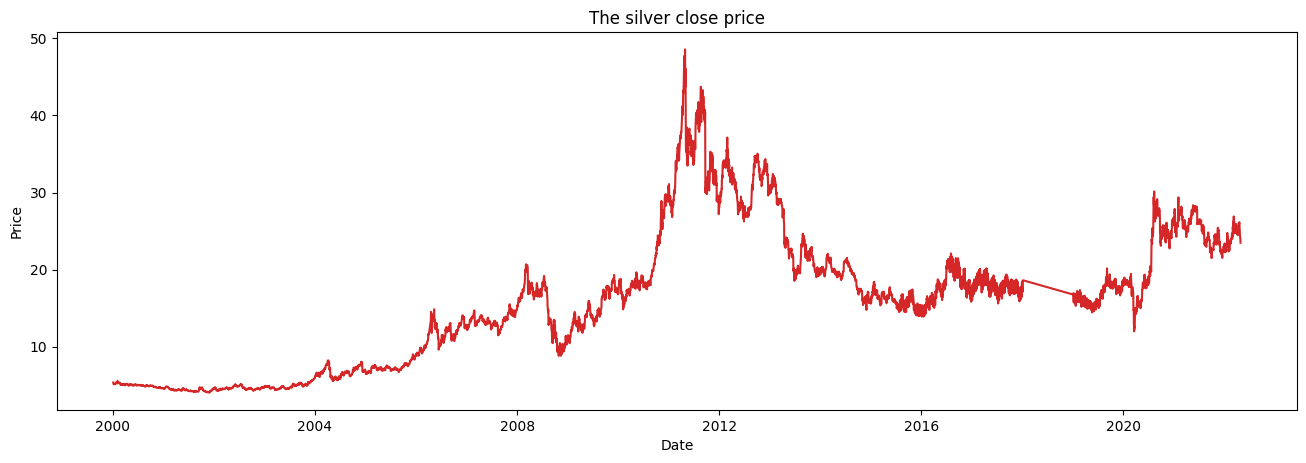

In [5]:
plot_df(df, x=df.index, y=df.Close, ylabel='Price', title="The silver close price")

In [6]:
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]

In [7]:
ultimos = df.groupby(['year', 'month'])['Date', 'Close'].max();

ultimos.reset_index(inplace=True)
ultimos.sort_values(by=['Date'],ascending=[True], inplace=True)

C:\Users\Salete\AppData\Local\Temp\ipykernel_1200\571485120.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ultimos = df.groupby(['year', 'month'])['Date', 'Close'].max();


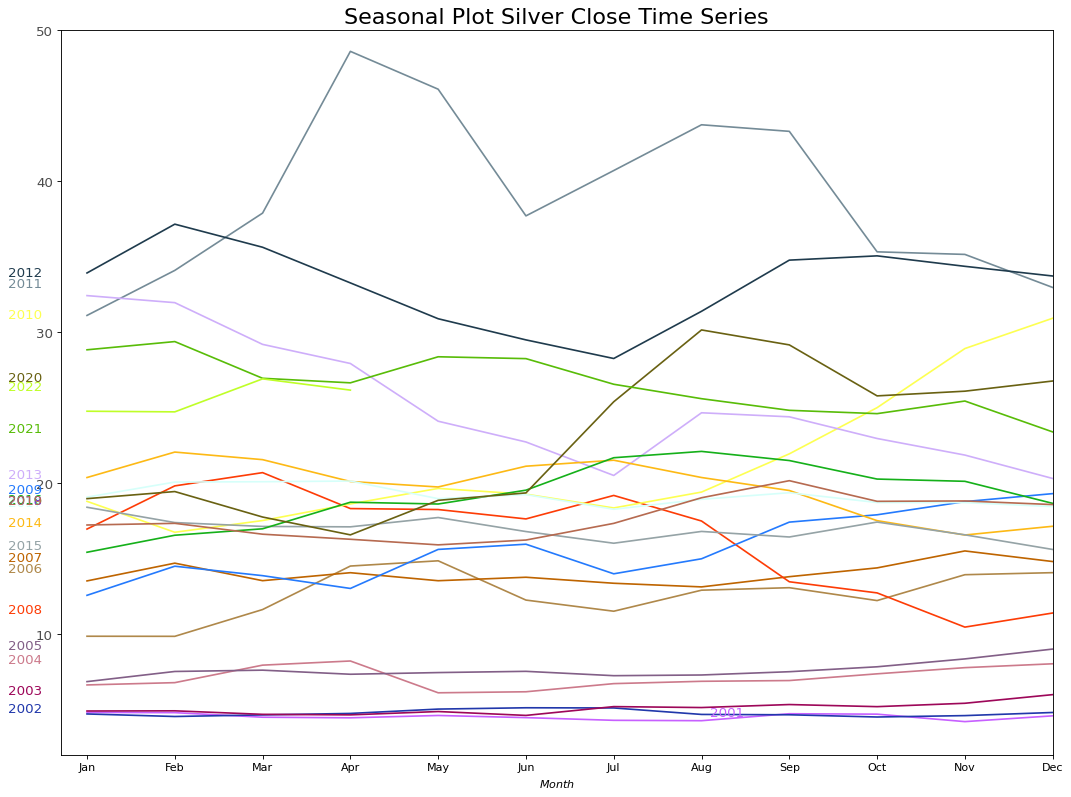

In [8]:
years = df['year'].unique()


# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'Close', data=ultimos.loc[ultimos.year==y, :], color=mycolors[i], label=y)
        plt.text(ultimos.loc[df.year==y, :].shape[0]-.9, ultimos.loc[ultimos.year==y, 'Close'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 50), xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot Silver Close Time Series", fontsize=20)
plt.show()